### This jupyter notebooks provides the code to give an introduction to the PyWavelets library. 
### To get some more background information, please have a look at the accompanying blog-post:
### http://ataspinar.com/2018/12/21/a-guide-for-using-the-wavelet-transform-in-machine-learning/

In [1]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# 1. Which Wavelets are present in PyWavelets?

In [2]:
wavelet_families = pywt.families(short=False)
discrete_mother_wavelets = pywt.wavelist(kind='discrete')
continuous_mother_wavelets = pywt.wavelist(kind='continuous')

print("PyWavelets contains the following families: ")
print(wavelet_families)
print()
print("PyWavelets contains the following Continuous families: ")
print(continuous_mother_wavelets)
print()
print("PyWavelets contains the following Discrete families: ")
print(discrete_mother_wavelets)
print()
for family in pywt.families():
    print("    * The {} family contains: {}".format(family, pywt.wavelist(family)))

PyWavelets contains the following families: 
['Haar', 'Daubechies', 'Symlets', 'Coiflets', 'Biorthogonal', 'Reverse biorthogonal', 'Discrete Meyer (FIR Approximation)', 'Gaussian', 'Mexican hat wavelet', 'Morlet wavelet', 'Complex Gaussian wavelets', 'Shannon wavelets', 'Frequency B-Spline wavelets', 'Complex Morlet wavelets']

PyWavelets contains the following Continuous families: 
['cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'mexh', 'morl', 'shan']

PyWavelets contains the following Discrete families: 
['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7'

# 2. Visualizing several Discrete and Continuous wavelets

/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


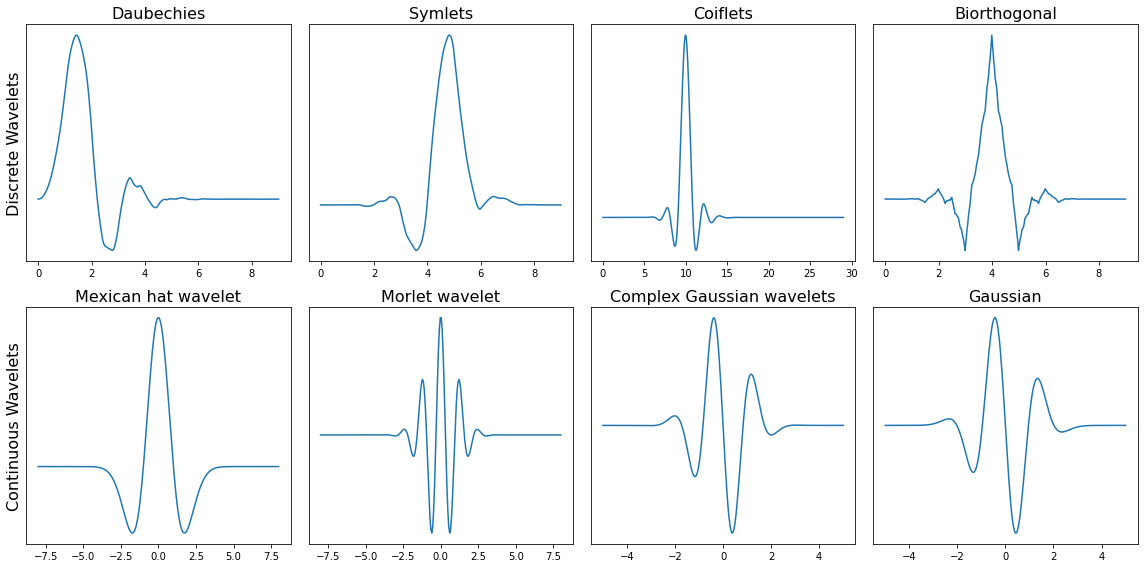

In [3]:
discrete_wavelets = ['db5', 'sym5', 'coif5', 'bior2.4']
continuous_wavelets = ['mexh', 'morl', 'cgau5', 'gaus5']

list_list_wavelets = [discrete_wavelets, continuous_wavelets]
list_funcs = [pywt.Wavelet, pywt.ContinuousWavelet]

fig, axarr = plt.subplots(nrows=2, ncols=4, figsize=(16,8))
for ii, list_wavelets in enumerate(list_list_wavelets):
    func = list_funcs[ii]
    row_no = ii
    for col_no, waveletname in enumerate(list_wavelets):
        wavelet = func(waveletname)
        family_name = wavelet.family_name
        biorthogonal = wavelet.biorthogonal
        orthogonal = wavelet.orthogonal
        symmetry = wavelet.symmetry
        if ii == 0:
            _ = wavelet.wavefun()
            wavelet_function = _[0]
            x_values = _[-1]
        else:
            wavelet_function, x_values = wavelet.wavefun()
        if col_no == 0 and ii == 0:
            axarr[row_no, col_no].set_ylabel("Discrete Wavelets", fontsize=16)
        if col_no == 0 and ii == 1:
            axarr[row_no, col_no].set_ylabel("Continuous Wavelets", fontsize=16)
        axarr[row_no, col_no].set_title("{}".format(family_name), fontsize=16)
        axarr[row_no, col_no].plot(x_values, wavelet_function)
        axarr[row_no, col_no].set_yticks([])
        axarr[row_no, col_no].set_yticklabels([])

plt.tight_layout()
plt.show()

## 3. Visualizing how the wavelet form depends on the order and decomposition level

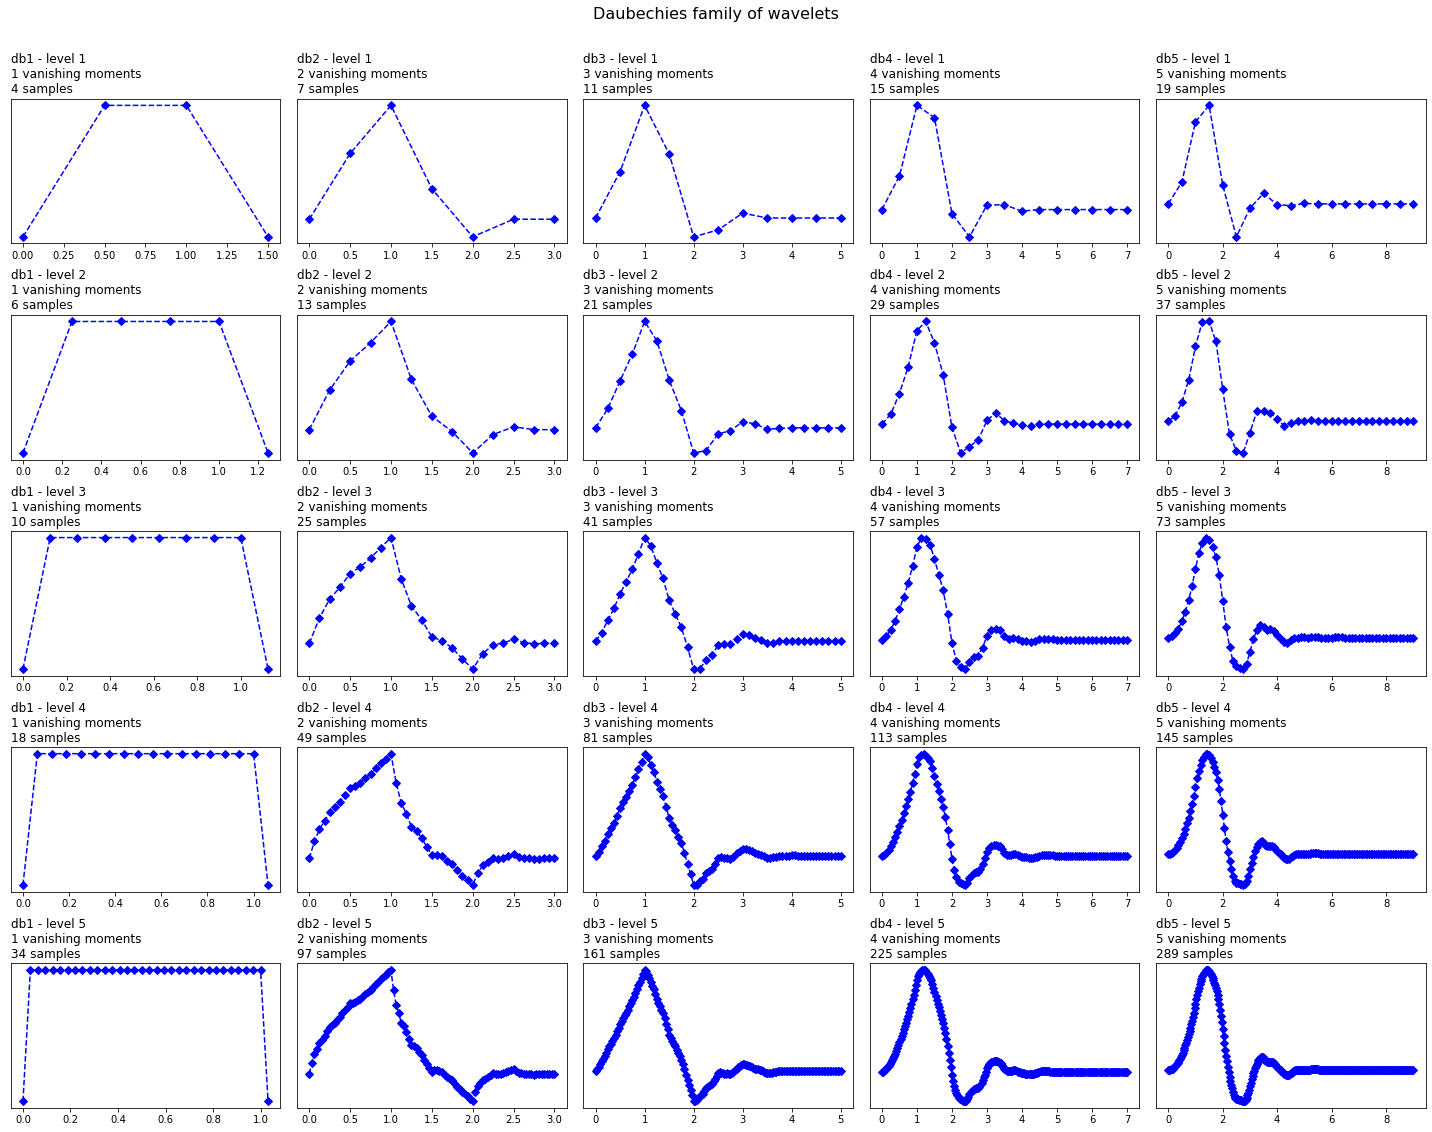

In [4]:
fig, axarr = plt.subplots(ncols=5, nrows=5, figsize=(20,16))
fig.suptitle('Daubechies family of wavelets', fontsize=16)

db_wavelets = pywt.wavelist('db')[:5]
for col_no, waveletname in enumerate(db_wavelets):
    wavelet = pywt.Wavelet(waveletname)
    no_moments = wavelet.vanishing_moments_psi
    family_name = wavelet.family_name
    for row_no, level in enumerate(range(1,6)):
        wavelet_function, scaling_function, x_values = wavelet.wavefun(level = level)
        axarr[row_no, col_no].set_title("{} - level {}\n{} vanishing moments\n{} samples".format(
            waveletname, level, no_moments, len(x_values)), loc='left')
        axarr[row_no, col_no].plot(x_values, wavelet_function, 'bD--')
        axarr[row_no, col_no].set_yticks([])
        axarr[row_no, col_no].set_yticklabels([])
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

## 4.A Using the pywt.dwt() for the decomposition of a signal into the frequency sub-bands
### (and reconstrucing it again)

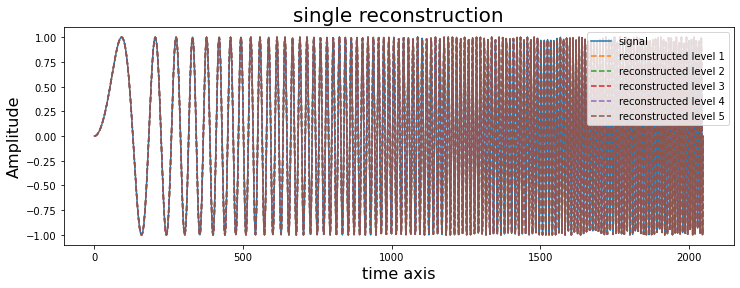

In [5]:
time = np.linspace(0, 1, num=2048)
chirp_signal = np.sin(250 * np.pi * time**2)

(cA1, cD1) = pywt.dwt(chirp_signal, 'db2', 'smooth')
(cA2, cD2) = pywt.dwt(cA1, 'db2', 'smooth')
(cA3, cD3) = pywt.dwt(cA2, 'db2', 'smooth')
(cA4, cD4) = pywt.dwt(cA3, 'db2', 'smooth')
(cA5, cD5) = pywt.dwt(cA4, 'db2', 'smooth')

coefficients_level1 = [cA1, cD1]
coefficients_level2 = [cA2, cD2, cD1]
coefficients_level3 = [cA3, cD3, cD2, cD1]
coefficients_level4 = [cA4, cD4, cD3, cD2, cD1]
coefficients_level5 = [cA5, cD5, cD4, cD3, cD2, cD1]

reconstructed_signal_level1 = pywt.waverec(coefficients_level1, 'db2', 'smooth')
reconstructed_signal_level2 = pywt.waverec(coefficients_level2, 'db2', 'smooth')
reconstructed_signal_level3 = pywt.waverec(coefficients_level3, 'db2', 'smooth')
reconstructed_signal_level4 = pywt.waverec(coefficients_level4, 'db2', 'smooth')
reconstructed_signal_level5 = pywt.waverec(coefficients_level5, 'db2', 'smooth')

fig, ax = plt.subplots(figsize=(12,4))
ax.plot(chirp_signal, label='signal')
ax.plot(reconstructed_signal_level1, label='reconstructed level 1', linestyle='--')
ax.plot(reconstructed_signal_level2, label='reconstructed level 2', linestyle='--')
ax.plot(reconstructed_signal_level3, label='reconstructed level 3', linestyle='--')
ax.plot(reconstructed_signal_level4, label='reconstructed level 4', linestyle='--')
ax.plot(reconstructed_signal_level5, label='reconstructed level 5', linestyle='--')
ax.legend(loc='upper right')
ax.set_title('single reconstruction', fontsize=20)
ax.set_xlabel('time axis', fontsize=16)
ax.set_ylabel('Amplitude', fontsize=16)
plt.show()


## 4.B Using the pywt.wavedec() for the decomposition of a signal into the frequency sub-bands
### (and reconstrucing it again)

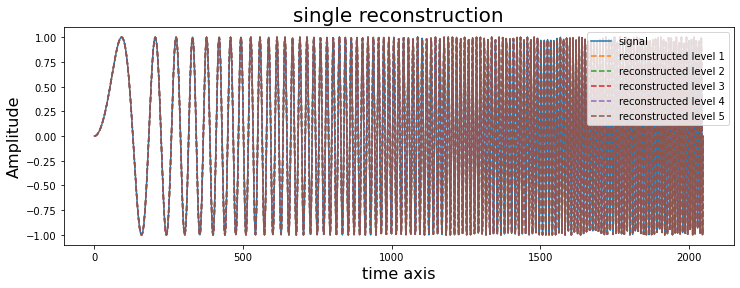

In [6]:
time = np.linspace(0, 1, num=2048)
chirp_signal = np.sin(250 * np.pi * time**2)

coefficients_level1 = pywt.wavedec(chirp_signal, 'db2', 'smooth', level=1)
coefficients_level2 = pywt.wavedec(chirp_signal, 'db2', 'smooth', level=2)
coefficients_level3 = pywt.wavedec(chirp_signal, 'db2', 'smooth', level=3)
coefficients_level4 = pywt.wavedec(chirp_signal, 'db2', 'smooth', level=4)
coefficients_level5 = pywt.wavedec(chirp_signal, 'db2', 'smooth', level=5)

reconstructed_signal_level1 = pywt.waverec(coefficients_level1, 'db2', 'smooth')
reconstructed_signal_level2 = pywt.waverec(coefficients_level2, 'db2', 'smooth')
reconstructed_signal_level3 = pywt.waverec(coefficients_level3, 'db2', 'smooth')
reconstructed_signal_level4 = pywt.waverec(coefficients_level4, 'db2', 'smooth')
reconstructed_signal_level5 = pywt.waverec(coefficients_level5, 'db2', 'smooth')

fig, ax = plt.subplots(figsize=(12,4))
ax.plot(chirp_signal, label='signal')
ax.plot(reconstructed_signal_level1, label='reconstructed level 1', linestyle='--')
ax.plot(reconstructed_signal_level2, label='reconstructed level 2', linestyle='--')
ax.plot(reconstructed_signal_level3, label='reconstructed level 3', linestyle='--')
ax.plot(reconstructed_signal_level4, label='reconstructed level 4', linestyle='--')
ax.plot(reconstructed_signal_level5, label='reconstructed level 5', linestyle='--')
ax.legend(loc='upper right')
ax.set_title('single reconstruction', fontsize=20)
ax.set_xlabel('time axis', fontsize=16)
ax.set_ylabel('Amplitude', fontsize=16)
plt.show()


## 5. Reconstrucing a signal with only one level of coefficients

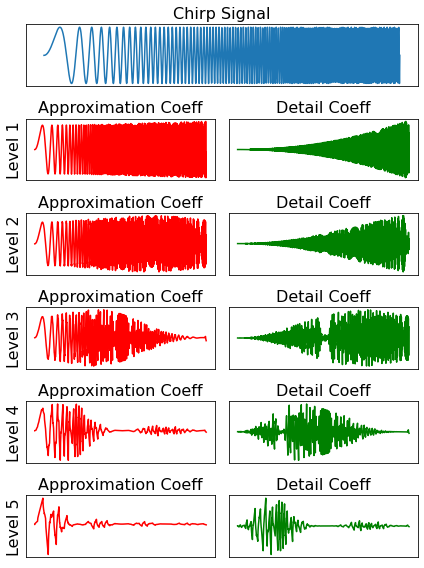

In [7]:
fig = plt.figure(figsize=(6,8))
spec = gridspec.GridSpec(ncols=2, nrows=6)
ax0 = fig.add_subplot(spec[0, 0:2])
ax1a = fig.add_subplot(spec[1, 0])
ax1b = fig.add_subplot(spec[1, 1])
ax2a = fig.add_subplot(spec[2, 0])
ax2b = fig.add_subplot(spec[2, 1])
ax3a = fig.add_subplot(spec[3, 0])
ax3b = fig.add_subplot(spec[3, 1])
ax4a = fig.add_subplot(spec[4, 0])
ax4b = fig.add_subplot(spec[4, 1])
ax5a = fig.add_subplot(spec[5, 0])
ax5b = fig.add_subplot(spec[5, 1])
axarr = np.array([[ax1a, ax1b],[ax2a, ax2b],[ax3a, ax3b],[ax4a, ax4b],[ax5a, ax5b]])

time = np.linspace(0, 1, num=2048)
chirp_signal = np.sin(250 * np.pi * time**2)


# First we reconstruct a signal using pywt.wavedec() as we have also done at #4.2
coefficients_level1 = pywt.wavedec(chirp_signal, 'db2', 'smooth', level=1)
coefficients_level2 = pywt.wavedec(chirp_signal, 'db2', 'smooth', level=2)
coefficients_level3 = pywt.wavedec(chirp_signal, 'db2', 'smooth', level=3)
coefficients_level4 = pywt.wavedec(chirp_signal, 'db2', 'smooth', level=4)
coefficients_level5 = pywt.wavedec(chirp_signal, 'db2', 'smooth', level=5)

# pywt.wavedec() returns a list of coefficients. Below we assign these list of coefficients to variables explicitely.
[cA1_l1, cD1_l1] = coefficients_level1
[cA2_l2, cD2_l2, cD1_l2] = coefficients_level2
[cA3_l3, cD3_l3, cD2_l3, cD1_l3] = coefficients_level3
[cA4_l4, cD4_l4, cD3_l4, cD2_l4, cD1_l4] = coefficients_level4
[cA5_l5, cD5_l5, cD4_l5, cD3_l5, cD2_l5, cD1_l5] = coefficients_level5

# Since the the list of coefficients have been assigned explicitely to variables, we can set a few of them to zero.
approx_coeff_level1_only = [cA1_l1, None]
detail_coeff_level1_only = [None, cD1_l1]

approx_coeff_level2_only = [cA2_l2, None, None]
detail_coeff_level2_only = [None, cD2_l2, None]

approx_coeff_level3_only = [cA3_l3, None, None, None]
detail_coeff_level3_only = [None, cD3_l3, None, None]

approx_coeff_level4_only = [cA4_l4, None, None, None, None]
detail_coeff_level4_only = [None, cD4_l4, None, None, None]

approx_coeff_level5_only = [cA5_l5, None, None, None, None, None]
detail_coeff_level5_only = [None, cD5_l5, None, None, None, None]


# By reconstrucing the signal back from only one set of coefficients, we can see how 
# the frequency-sub band for that specific set of coefficient looks like
rec_signal_cA_level1 = pywt.waverec(approx_coeff_level1_only, 'db2', 'smooth')
rec_signal_cD_level1 = pywt.waverec(detail_coeff_level1_only, 'db2', 'smooth')

rec_signal_cA_level2 = pywt.waverec(approx_coeff_level2_only, 'db2', 'smooth')
rec_signal_cD_level2 = pywt.waverec(detail_coeff_level2_only, 'db2', 'smooth')

rec_signal_cA_level3 = pywt.waverec(approx_coeff_level3_only, 'db2', 'smooth')
rec_signal_cD_level3 = pywt.waverec(detail_coeff_level3_only, 'db2', 'smooth')

rec_signal_cA_level4 = pywt.waverec(approx_coeff_level4_only, 'db2', 'smooth')
rec_signal_cD_level4 = pywt.waverec(detail_coeff_level4_only, 'db2', 'smooth')

rec_signal_cA_level5 = pywt.waverec(approx_coeff_level5_only, 'db2', 'smooth')
rec_signal_cD_level5 = pywt.waverec(detail_coeff_level5_only, 'db2', 'smooth')


ax0.set_title("Chirp Signal", fontsize=16)
ax0.plot(time, chirp_signal)
ax0.set_xticks([])
ax0.set_yticks([])
ax1a.plot(rec_signal_cA_level1, color='red')
ax1b.plot(rec_signal_cD_level1, color='green')
ax2a.plot(rec_signal_cA_level2, color='red')
ax2b.plot(rec_signal_cD_level2, color='green')
ax3a.plot(rec_signal_cA_level3, color='red')
ax3b.plot(rec_signal_cD_level3, color='green')
ax4a.plot(rec_signal_cA_level4, color='red')
ax4b.plot(rec_signal_cD_level4, color='green')
ax5a.plot(rec_signal_cA_level5, color='red')
ax5b.plot(rec_signal_cD_level5, color='green')

for ii in range(0,5):
    axarr[ii,0].set_xticks([])
    axarr[ii,0].set_yticks([])
    axarr[ii,1].set_xticks([])
    axarr[ii,1].set_yticks([])
    axarr[ii,0].set_title("Approximation Coeff", fontsize=16)
    axarr[ii,1].set_title("Detail Coeff", fontsize=16)
    axarr[ii,0].set_ylabel("Level {}".format(ii+1), fontsize=16)
plt.tight_layout()
plt.show()